In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/content/drive/MyDrive/ToyotaCorolla - MLR.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)




In [41]:
# Inspect and normalize column names
print("Original Column Names:")
print(data.columns.tolist())

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print("\nNormalized Column Names:")
print(data.columns.tolist())

# Rename columns for consistency if necessary
data.rename(columns={'age_08_04': 'age', 'fuel_type': 'fueltype'}, inplace=True)

# Verify if target column exists
if 'price' not in data.columns:
    raise KeyError("Target column 'Price' is missing. Available columns: ", data.columns.tolist())

Original Column Names:
['price', 'age_08_04', 'km', 'fuel_type', 'hp', 'automatic', 'cc', 'doors', 'cylinders', 'gears', 'weight']

Normalized Column Names:
['price', 'age_08_04', 'km', 'fuel_type', 'hp', 'automatic', 'cc', 'doors', 'cylinders', 'gears', 'weight']


In [43]:
# Exploratory Data Analysis (EDA)
print("\nSummary Statistics:")
print(data.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())




Summary Statistics:
               price          age             km fueltype           hp  \
count    1436.000000  1436.000000    1436.000000     1436  1436.000000   
unique           NaN          NaN            NaN        3          NaN   
top              NaN          NaN            NaN   Petrol          NaN   
freq             NaN          NaN            NaN     1264          NaN   
mean    10730.824513    55.947075   68533.259749      NaN   101.502089   
std      3626.964585    18.599988   37506.448872      NaN    14.981080   
min      4350.000000     1.000000       1.000000      NaN    69.000000   
25%      8450.000000    44.000000   43000.000000      NaN    90.000000   
50%      9900.000000    61.000000   63389.500000      NaN   110.000000   
75%     11950.000000    70.000000   87020.750000      NaN   110.000000   
max     32500.000000    80.000000  243000.000000      NaN   192.000000   

          automatic           cc        doors  cylinders        gears  \
count   1436.0000

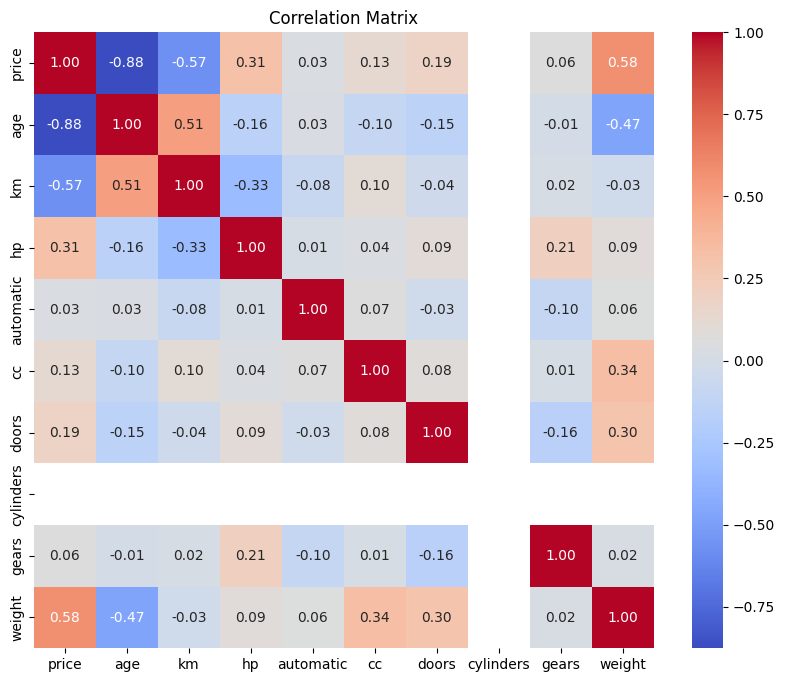

In [45]:
# Correlation matrix (for numeric columns only)
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


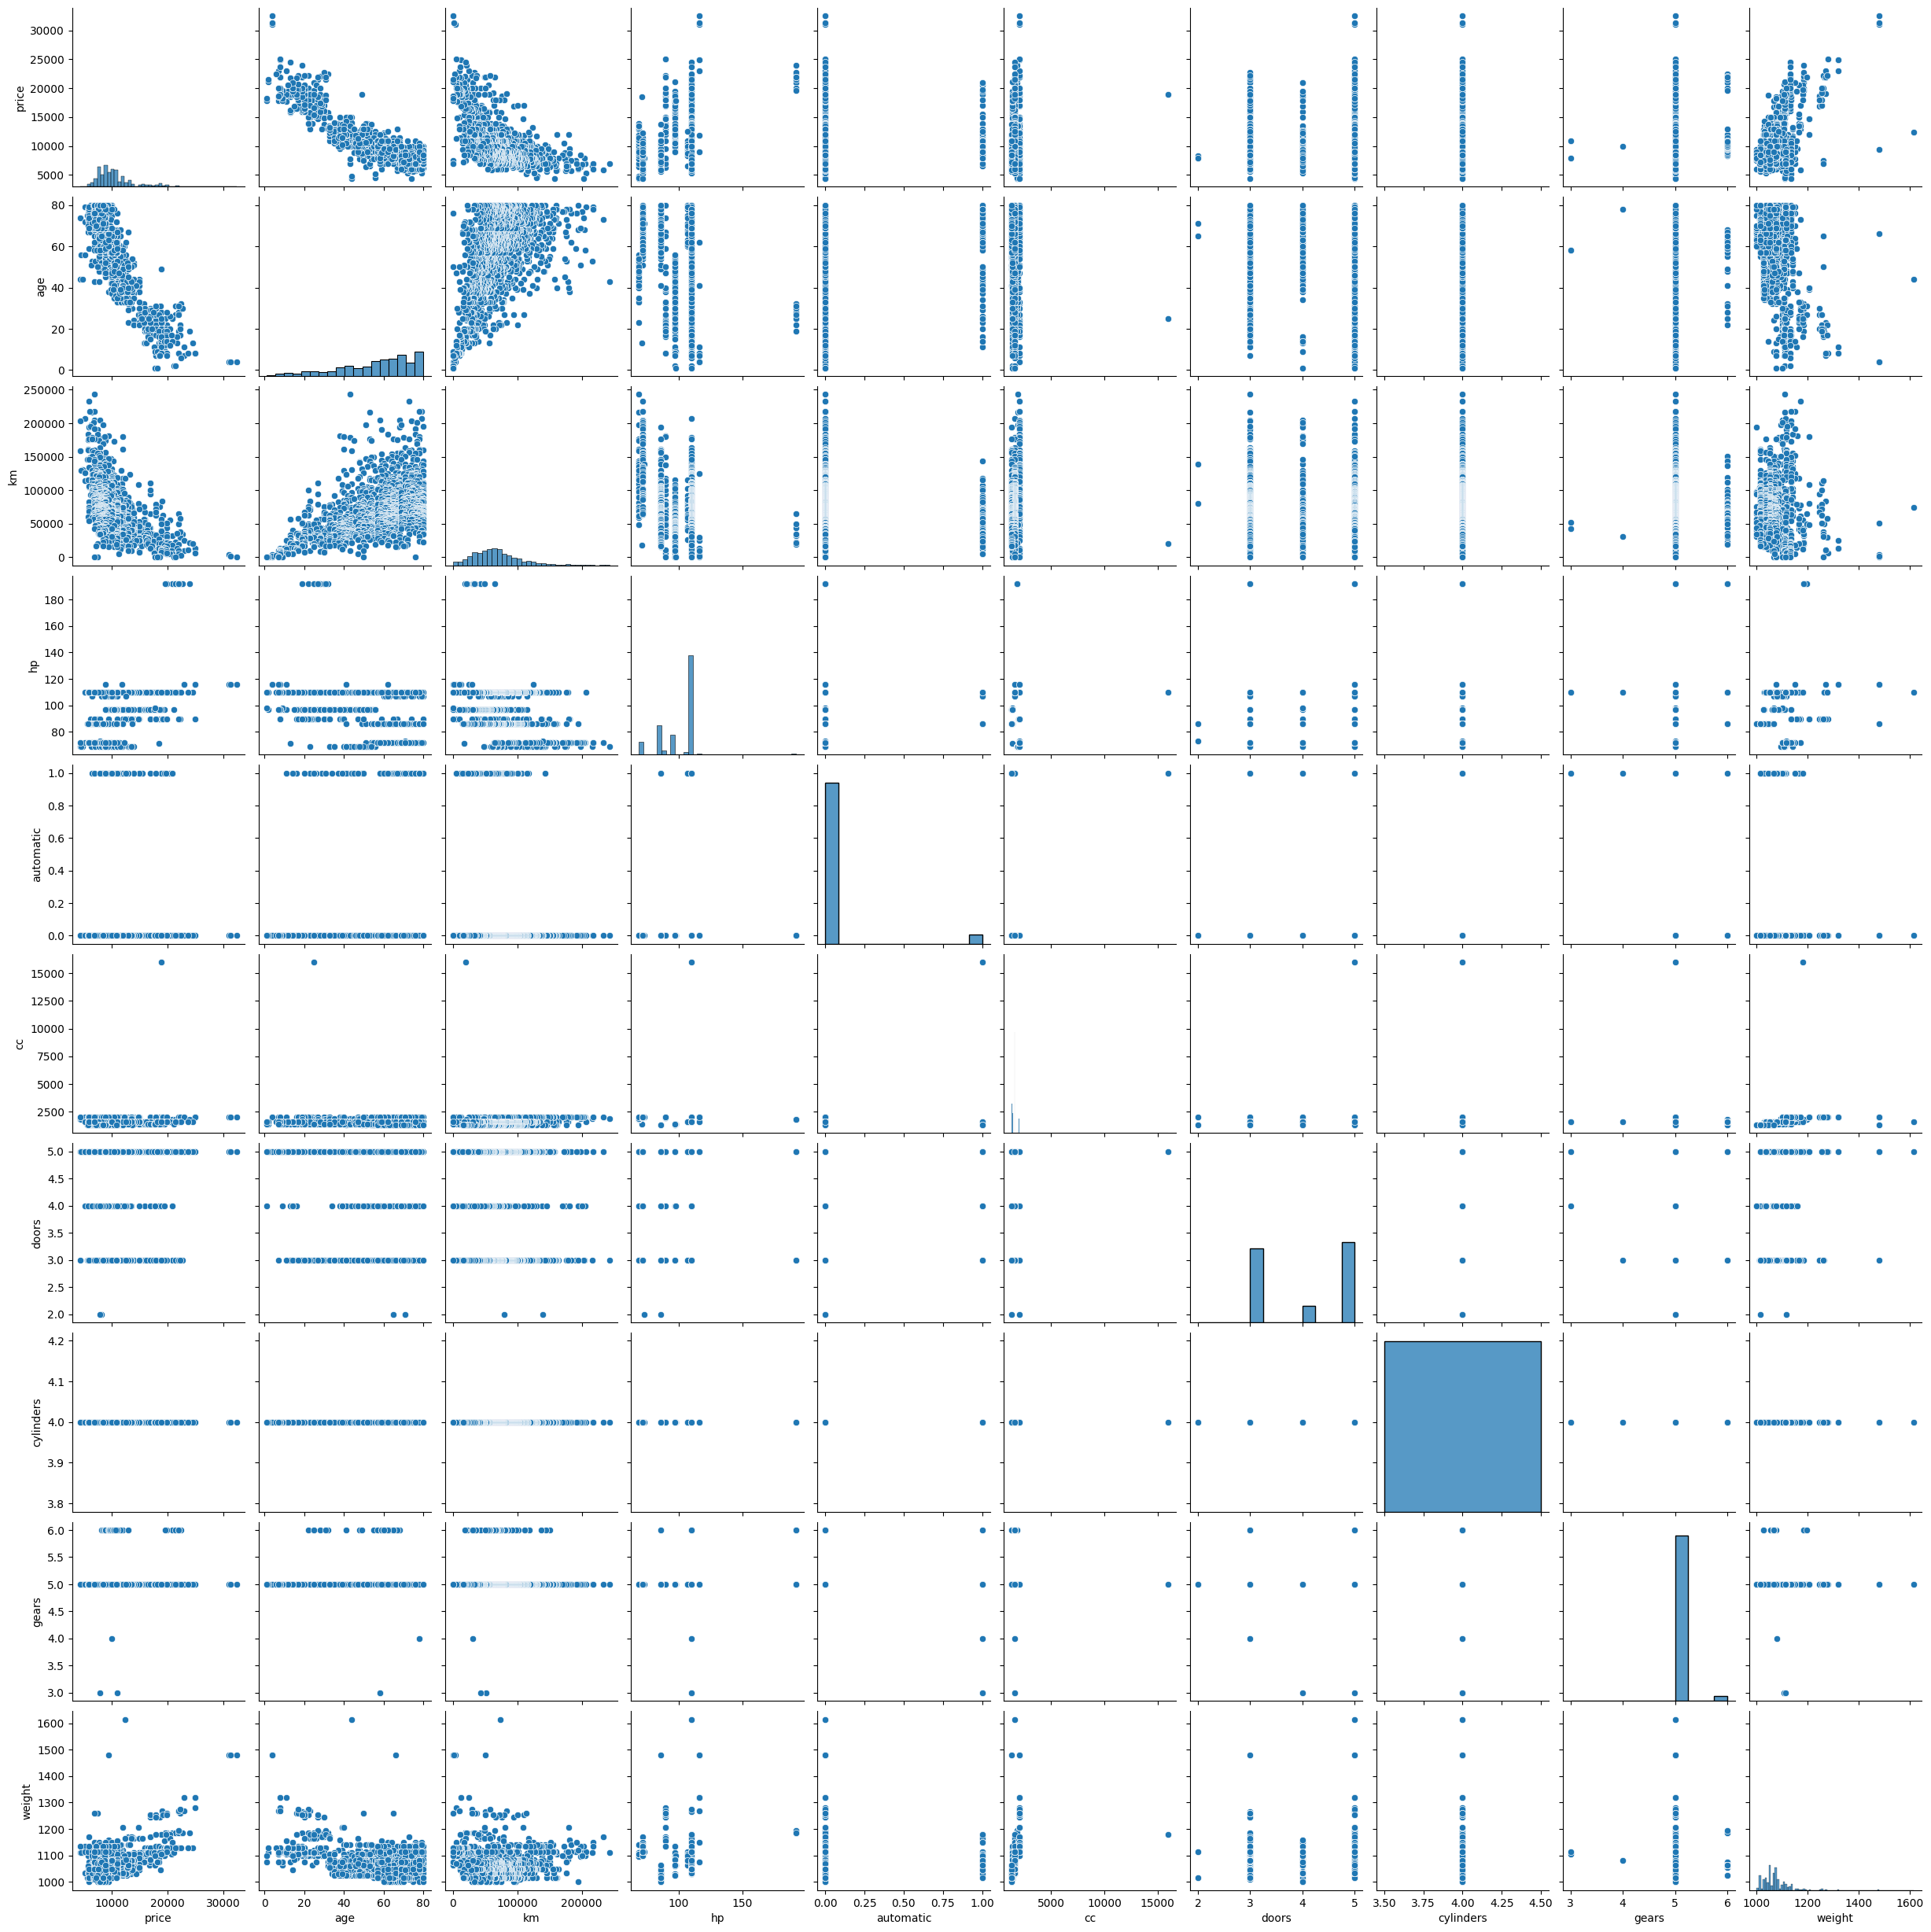

In [46]:
# Visualizations
sns.pairplot(numeric_data)
plt.show()


In [47]:
# Data Preprocessing
X = data.drop(columns=['price'])  # Features
y = data['price']  # Target variable

# Identify categorical and numeric columns
categorical_features = ['fueltype', 'automatic']
numeric_features = [col for col in X.columns if col not in categorical_features]


In [48]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Encode categorical features
    ])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Multiple Linear Regression Model
mlr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

mlr_pipeline.fit(X_train, y_train)
y_pred = mlr_pipeline.predict(X_test)


In [50]:
# Model Evaluation
print("\nMultiple Linear Regression Model")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



Multiple Linear Regression Model
Mean Squared Error: 2203043.823143705
R2 Score: 0.834888804061108


In [51]:
# Ridge Regression
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_pipeline.fit(X_train, y_train)
ridge_pred = ridge_pipeline.predict(X_test)

print("\nRidge Regression Model")
print("Mean Squared Error:", mean_squared_error(y_test, ridge_pred))
print("R2 Score:", r2_score(y_test, ridge_pred))



Ridge Regression Model
Mean Squared Error: 2197733.5880959723
R2 Score: 0.835286789453063


In [52]:
# Lasso Regression
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])

lasso_pipeline.fit(X_train, y_train)
lasso_pred = lasso_pipeline.predict(X_test)

print("\nLasso Regression Model")
print("Mean Squared Error:", mean_squared_error(y_test, lasso_pred))
print("R2 Score:", r2_score(y_test, lasso_pred))



Lasso Regression Model
Mean Squared Error: 2202200.3078656103
R2 Score: 0.8349520228745042
